In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("C:/Users/Mohammed/Downloads/netflix_titles.csv")

In [7]:
#Check for missing values:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

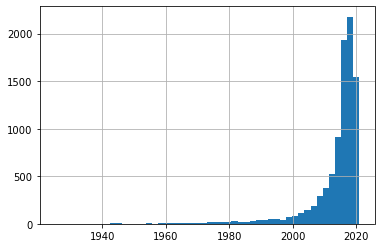

In [8]:
df["release_year"].hist(bins=50)

In [9]:
df["country"].value_counts()

United States                                  2818
India                                           972
United Kingdom                                  419
Japan                                           245
South Korea                                     199
                                               ... 
Switzerland, France, Belgium, United States       1
United Kingdom, Lithuania                         1
Italy, United Kingdom                             1
United States, Australia, Mexico                  1
Egypt, Denmark, Germany                           1
Name: country, Length: 748, dtype: int64

In [10]:
df["country_number"] = df["country"].str.split(',').str.len()
df["country_number"].describe()

count    7976.000000
mean        1.256143
std         0.698381
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        12.000000
Name: country_number, dtype: float64

In [11]:
d = df["country"].str.split(',', expand=True)
d.columns = ["country1", "country2", "country3", "country4", "country5", "country6", "country7", "country8",
             "country9", "country10", "country11", "country12"]

In [12]:
df = pd.concat([df, d], axis=1)

<AxesSubplot:>

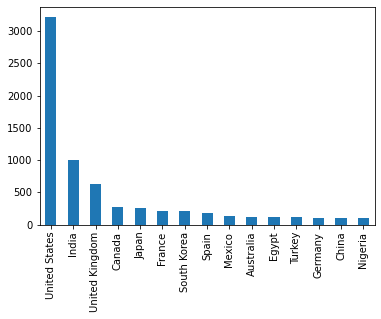

In [13]:
df["country1"].value_counts()[:15].plot(kind="bar")

<AxesSubplot:>

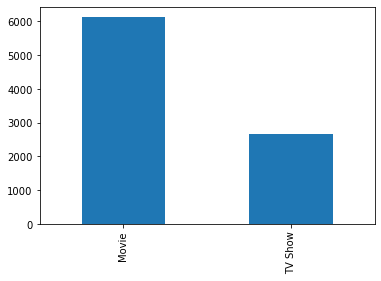

In [14]:
df["type"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='country1'>

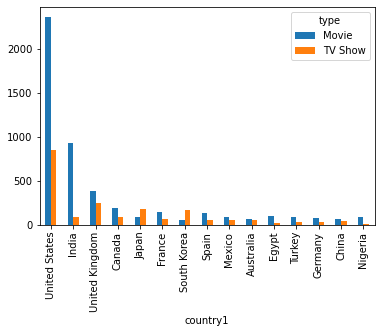

In [15]:
by_country = df[["country1", "type"]].groupby(["country1", "type"]).size().reset_index(name="count").pivot(index="country1", columns="type", values="count")
by_country["total"] = by_country.sum(axis=1)
by_country.sort_values("total", ascending=False)[:15].drop("total", axis=1).plot(kind="bar")

In [16]:
df["director"].value_counts()

Rajiv Chilaka                    19
Raúl Campos, Jan Suter           18
Marcus Raboy                     16
Suhas Kadav                      16
Jay Karas                        14
                                 ..
Bryan Buckley                     1
Amarpreet G S Chabbra             1
Andrew Duncan, Ken Cunningham     1
Kumaran                           1
Susan Glatzer                     1
Name: director, Length: 4528, dtype: int64

In [17]:
df["director_number"] = df["director"].str.split(',').str.len()
df["director_number"].describe()

count    6173.000000
mean        1.130407
std         0.556296
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: director_number, dtype: float64

In [18]:
df[["title"]][df["director_number"] > 5].size

13

<AxesSubplot:>

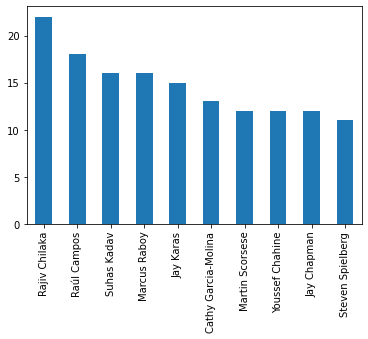

In [19]:
d = df["director"].str.split(',', expand=True)
# i just want the name of the first
d = d.iloc[:, 0]
d.rename("director1", inplace=True)
df = pd.concat([df, d], axis=1)
df["director1"].value_counts()[:10].plot(kind="bar")

In [20]:
df["date_added"].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [21]:
df["date_added"] = pd.to_datetime(df["date_added"])

<AxesSubplot:xlabel='date_added'>

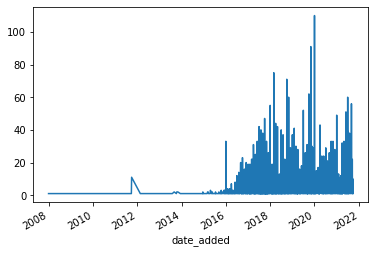

In [22]:
#We now plot:
df.groupby("date_added").size().plot(kind="line")

<AxesSubplot:xlabel='date_added'>

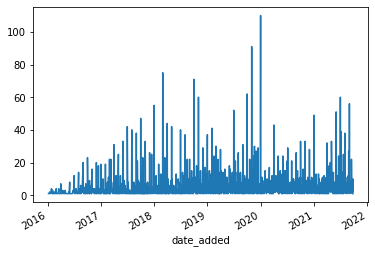

In [23]:
df[df["date_added"] > pd.Timestamp(2016, 1, 1)].groupby("date_added").size().plot(kind="line")

<AxesSubplot:xlabel='time_to_add'>

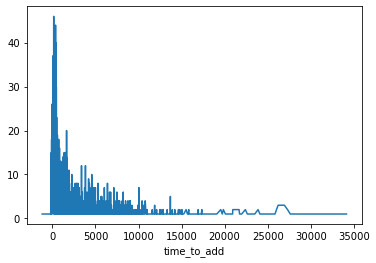

In [25]:
release_year = df["release_year"].apply(lambda x: pd.Timestamp(x, 7, 1))
# now get the difference between date added and date released for each movie
df["time_to_add"] = (df["date_added"] - release_year).dt.days
df.groupby("time_to_add").size().plot(kind="line")

<AxesSubplot:xlabel='time_to_add'>

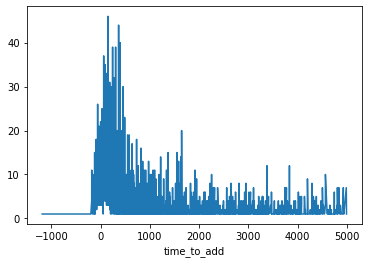

In [26]:
#The vast majority are less than 5000 days old. Let us zoom in on that area:

df[df["time_to_add"] < 5000].groupby("time_to_add").size().plot(kind="line")

<AxesSubplot:>

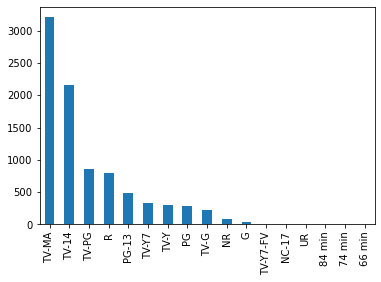

In [27]:
#Finally, let us look at the ratings to see the largest category on Netflix:

df["rating"].value_counts().plot(kind="bar")